# SVN: Support Vector Machine

    Not linear classification algorithm

Imports

In [30]:
import math


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import stats
from sklearn import model_selection

## Generate dataset

## V1

Functions that generates the spiral points _(inspired by [this](https://conx.readthedocs.io/en/latest/Two-Spirals.html))_

__Problem__: It only works for 100 points maximum;

In [13]:

def getSpiral(spiralClass = 1, nPoints = 100) -> tuple:
    '''
        - spiralClass should be 1 or -1;
    '''

    X = np.zeros( (nPoints, 1) )
    Y = np.zeros( (nPoints, 1) )

    for i in range(nPoints):
        x, y = spiral_xy(i, spiralClass)
        X[i, :] = x
        Y[i, :] = y

    return X, Y


def getSpiralPoint(i, spiralClass = 1) -> tuple:
    φ = i/16 * math.pi
    r = 6.5 * ((104 - i)/104)
    x = (r * math.cos(φ) * spiralClass)/13 + 0.5
    y = (r * math.sin(φ) * spiralClass)/13 + 0.5
    return x, y

Plot spirals

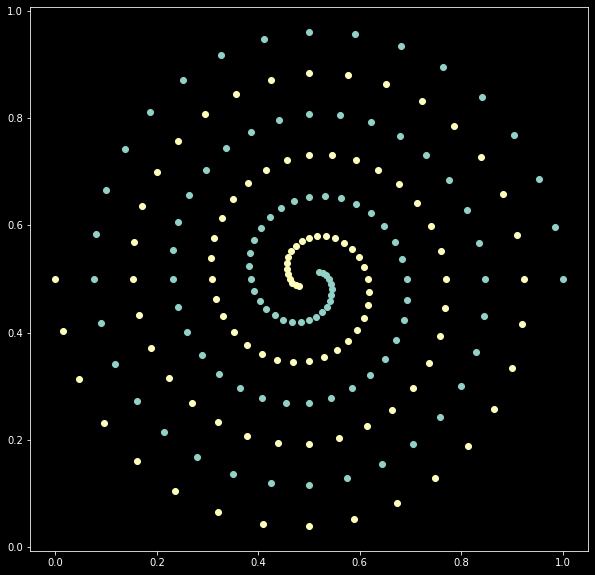

In [19]:
nPoints = 100

x1, y1 = spiral(1, nPoints)
x2, y2 = spiral(-1, nPoints)


plt.rcParams["figure.figsize"] = (10, 10)
plt.scatter(x1, y1)
plt.scatter(x2, y2)

## V2
Generator took from [here](https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5)

In [36]:
N = 500

# Generate points
theta = np.sqrt(np.random.rand(N))*2*np.pi # np.linspace(0,2*pi,100)

r_a = 2*theta + np.pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - np.pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)


# Save DS File
ds = pd.DataFrame(columns=['x', 'y', 'label'], data=res)
# np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

Plot DS

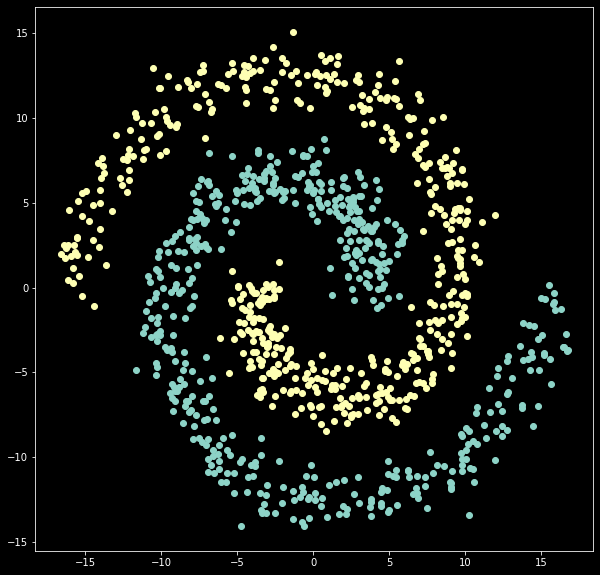

In [33]:

plt.rcParams["figure.figsize"] = (10, 10)
plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

# Foo

In [46]:

# Set parameters
isReproduceble = True
randomState = 100 if isReproduceble else None

features = ds[ ['x', 'y'] ]
labels = ds['label']
testSize = .4

# Split data
splitData = model_selection.train_test_split(features, labels, test_size=testSize, random_state=randomState)

xTrain = np.array(splitData[0])
xTest = np.array(splitData[1])
yTrain = np.array(splitData[2])
yTest = np.array(splitData[3])
